

```
# This is formatted as code
```

# Gesture Recognition
In this group project, you are going to build a 3D Conv model that will be able to predict the 5 gestures correctly. Please import the following libraries to get started.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd  
import os

#from scipy.misc import imread, imresize # this is deprecated
import datetime
import os
import glob as gb
import imageio # using as an alternative of imread as it is deprecated
from PIL import Image # using as an alternative of imread as it is deprecated
from collections import deque
import copy
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

from sklearn.utils import shuffle
from keras.utils import np_utils 
import warnings
warnings.filterwarnings('ignore')

We set the random seed so that the results don't vary drastically.

In [ ]:
! pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install --upgrade --force-reinstall --no-deps kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 2.4 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=ee7a579943918a98fd934acc2419c863a400e6ff7ab878c9bbc3504f872b8c4a
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/imsparsh/gesture-recognition")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alyaaselim
Your Kaggle Key: ··········


100%|██████████| 1.60G/1.60G [00:12<00:00, 142MB/s]


In [ ]:

 ! pip install np_utils


In [ ]:
np.random.seed(30)
import random as rn
rn.seed(30)
import tensorflow as tf
tf.random.set_seed(30)



```
# This is formatted as code
```

# About Dataset


This dataset has 5 gestures having 30 frames in sequence for each sample.

Each gesture corresponds to the following specific command:

Thumbs up: Increase the volume
Thumbs down: Decrease the volume
Left swipe: 'Jump' backward 10 seconds
Right swipe: 'Jump' forward 10 seconds
Stop: Pause the movie
Each video is a sequence of 30 frames (or images).

The data contains a 'train' and a 'val' folder with two CSV files for the two folders. These folders are in turn divided into subfolders where each subfolder represents a video of a particular gesture. Each subfolder, i.e. a video, contains 30 frames (or images). Note that all images in a particular video subfolder have the same dimensions but different videos may have different dimensions. Specifically, videos have two types of dimensions - either 360x360 or 120x160 (depending on the webcam used to record the videos).

Each row of the CSV file represents one video and contains three main pieces of information - the name of the subfolder containing the 30 images of the video sample (gesture), the name of the gesture, and the numeric label (between 0-4) of the video.

Read the folder names for training and validation. 

In [ ]:
train_doc = np.random.permutation(open('gesture-recognition/train.csv').readlines())
val_doc = np.random.permutation(open('gesture-recognition/val.csv').readlines())

batch_size = 64 #experiment with the batch size
train_doc 

array(['WIN_20180926_16_54_08_Pro_Right_Swipe_new;Right_Swipe_new;1\n',
       'WIN_20180925_18_02_58_Pro_Thumbs_Down_new;Thumbs_Down_new;3\n',
       'WIN_20180925_17_33_08_Pro_Left_Swipe_new;Left_Swipe_new;0\n',
       'WIN_20180925_17_51_17_Pro_Thumbs_Up_new;Thumbs_Up_new;4\n',
       'WIN_20180926_17_17_35_Pro_Left_Swipe_new;Left_Swipe_new;0\n',
       'WIN_20180926_17_30_47_Pro_Thumbs_Up_new;Thumbs_Up_new;4\n',
       'WIN_20180926_17_29_23_Pro_Stop_new;Stop_new;2\n',
       'WIN_20180926_17_12_26_Pro_Thumbs_Up_new;Thumbs_Up_new;4\n',
       'WIN_20180926_17_29_01_Pro_Stop_new;Stop_new;2\n',
       'WIN_20180907_16_32_11_Pro_Stop Gesture_new;Stop Gesture_new;2\n',
       'WIN_20180926_17_06_01_Pro_Stop_new;Stop_new;2\n',
       'WIN_20180907_16_52_18_Pro_Stop Gesture_new;Stop Gesture_new;2\n',
       'WIN_20180907_16_39_19_Pro_Left Swipe_new_Left Swipe_new;Left Swipe_new_Left Swipe_new;0\n',
       'WIN_20180925_17_19_16_Pro_Thumbs_Up_new;Thumbs_Up_new;4\n',
       'WIN_20180907_1

In [ ]:
len(train_doc)

663

In [ ]:
len(val_doc)

100

In [ ]:
if not os.path.exists('data_files'):
    os.mkdir('data_files')
if not os.path.exists('data_files/train'):
    os.mkdir('data_files/train') 
if not os.path.exists('data_files/test'):
    os.mkdir('data_files/test')     

## Create csv file for training data

In [ ]:
root_data_dir = 'gesture-recognition'
# Assigning labels to each flower category
num_classes = 5 
df=pd.read_csv('gesture-recognition/train.csv',sep=';',usecols = [0,2])
labels_name= {row[0] : row[1] for _, row in df.iterrows()}
#test label 
df_test=pd.read_csv('gesture-recognition/val.csv',sep=';',usecols = [0,2])
test_labels_name= {row[0] : row[1] for _, row in df_test.iterrows()}
test_labels_name


{'WIN_20180925_17_43_01_Pro_Left_Swipe_new': 0,
 'WIN_20180925_18_01_40_Pro_Left_Swipe_new': 0,
 'WIN_20180925_18_03_21_Pro_Left_Swipe_new': 0,
 'WIN_20180926_16_46_22_Pro_Left_Swipe_new': 0,
 'WIN_20180926_16_47_09_Pro_Left_Swipe_new': 0,
 'WIN_20180926_17_05_38_Pro_Left_Swipe_new': 0,
 'WIN_20180926_17_08_09_Pro_Left_Swipe_new': 0,
 'WIN_20180926_17_09_33_Pro_Left_Swipe_new': 0,
 'WIN_20180926_17_15_35_Pro_Left_Swipe_new': 0,
 'WIN_20180926_17_21_48_Pro_Left_Swipe_new': 0,
 'WIN_20180926_17_32_55_Pro_Left_Swipe_new': 0,
 'WIN_20180926_17_40_21_Pro_Left_Swipe_new': 0,
 'WIN_20180925_17_25_06_Pro_Right_Swipe_new': 1,
 'WIN_20180925_17_43_46_Pro_Right_Swipe_new': 1,
 'WIN_20180926_16_48_40_Pro_Right_Swipe_new': 1,
 'WIN_20180926_16_52_49_Pro_Right_Swipe_new': 1,
 'WIN_20180926_17_01_52_Pro_Right_Swipe_new': 1,
 'WIN_20180926_17_03_57_Pro_Right_Swipe_new': 1,
 'WIN_20180926_17_12_27_Pro_Right_Swipe_new': 1,
 'WIN_20180926_17_24_12_Pro_Right_Swipe_new': 1,
 'WIN_20180926_17_29_34_Pro_Righ

In [ ]:
# Loop over every activity category in train and test /content/gesture-recognition
train_data_path = os.path.join('/content/gesture-recognition','train')
test_data_path = os.path.join('/content/gesture-recognition','val')
data_dir_list = os.listdir(train_data_path)
data_dir_list

['WIN_20180907_15_53_12_Pro_Thumbs Up_new',
 'WIN_20180925_18_07_19_Pro_Left_Swipe_new',
 'WIN_20180907_15_49_59_Pro_Thumbs Up_new',
 'WIN_20180925_17_37_14_Pro_Stop_new',
 'WIN_20180926_17_15_56_Pro_Right_Swipe_new',
 'WIN_20180926_17_06_12_Pro_Left_Swipe_new',
 'WIN_20180926_17_39_18_Pro_Thumbs_Down_new',
 'WIN_20180926_17_32_01_Pro_Thumbs_Down_new',
 'WIN_20180926_16_58_27_Pro_Right_Swipe_new',
 'WIN_20180925_17_20_16_Pro_Thumbs_Up_new',
 'WIN_20180907_16_11_36_Pro_Right Swipe_new',
 'WIN_20180925_17_21_28_Pro_Left_Swipe_new',
 'WIN_20180925_17_31_48_Pro_Stop_new',
 'WIN_20180925_18_06_22_Pro_Left_Swipe_new',
 'WIN_20180925_17_25_14_Pro_Thumbs_Up_new',
 'WIN_20180907_16_12_20_Pro_Right Swipe_new',
 'WIN_20180926_17_08_38_Pro_Thumbs_Down_new',
 'WIN_20180925_17_44_12_Pro_Thumbs_Up_new',
 'WIN_20180926_17_23_39_Pro_Left_Swipe_new',
 'WIN_20180926_17_30_12_Pro_Thumbs_Up_new',
 'WIN_20180907_16_06_32_Pro_Thumbs Up_new',
 'WIN_20180926_17_51_06_Pro_Stop_new',
 'WIN_20180926_17_33_51_Pro_

In [ ]:
# rmdir /content/.ipynb_checkpoints

rmdir: failed to remove '/content/.ipynb_checkpoints': No such file or directory


In [ ]:
# rmdir /content/gesture-recognition/train/.ipynb_checkpoints

In [ ]:
 rmdir 

  training
video_list = os.listdir(train_data_path)
for vid  in video_list: # looping over gesture-recognition /train and return vedio name  "sub folder in train"
    label = labels_name[str(vid)]
    train_df = pd.DataFrame(columns=['FileName', 'Label', 'ClassName'])
    img_list = os.listdir(os.path.join(train_data_path,vid)) 

    for img in img_list:# looping over every frame within the video
            img_path = os.path.join(train_data_path,vid,img)
            #print(img_path)
            train_df = train_df.append({'FileName': img_path, 'Label': label,'ClassName':vid },ignore_index=True)
    file_name='{}.csv'.format(vid)
    train_df.to_csv('data_files/train/{}'.format(file_name))
 


In [ ]:
len(os.listdir("data_files/train"))

662

In [ ]:
#validation

video_list = os.listdir(test_data_path)
for vid  in video_list: # looping over gesture-recognition /train and return vedio name  "sub folder in test"
    #print(vid)
    label = test_labels_name[str(vid)]
#     print(label)
    test_df= pd.DataFrame(columns=['FileName', 'Label', 'ClassName'])
    img_list = os.listdir(os.path.join(test_data_path,vid)) 

    for img in img_list:# looping over every frame within the video
            img_path = os.path.join(test_data_path,vid,img)
            #print(img_path)
            test_df = test_df.append({'FileName': img_path, 'Label': label,'ClassName':vid },ignore_index=True)
    file_name='{}.csv'.format(vid)
    test_df.to_csv('data_files/test/{}'.format(file_name))

## load_samples



output will be like                                                                                                       

 sample= [[[data_files\train\WIN_20180907_15_44_32_Pro_Thumbs Down_new\img1,data_files\train\WIN_20180907_15_44_32_Pro_Thumbs Down_new\img2,data_files\train\WIN_20180907_15_44_32_Pro_Thumbs Down_new\img3],label1], [[data_files\train\WIN_20180907_15_44_55_Pro_Stop Gesture_new\img10,data_files\train\WIN_20180907_15_44_55_Pro_Stop Gesture_new\img11,…],label1],……….]                                                                                              
 sample [[16frame name],acorrespond label]                                                                                      
then will take this loading sample to feed data_gereation



In [ ]:
# reading the video files from the csv file
# data_files - list of csv files to be read.
#data_path= data_files\train
def file_generator(data_path,data_files,temporal_stride=1,temporal_length=20):
  
   
  # read all the csv files (one csv file corresponds to one vdieo) in data_files one by one
    for file in data_files: #data file folder  have both train and test sub folder
        tmp_df = pd.read_csv(os.path.join(data_path,file)) #ex:data_files\train\any_vedio_name
        label_list = list(tmp_df['Label'])  # Load all the labels in the label_list
        total_images = len(label_list) 
        if total_images>=temporal_length: # only if the number of frames in the video is greater tha temporal length, use that video
            num_samples = int((total_images-temporal_length)/temporal_stride)+1
            print ('num of samples from vid seq-{}: {}'.format(file,num_samples))
            img_list = list(tmp_df['FileName'])
        else: # if the number of frames are less than temporal length , discard it
            print ('num of frames is less than temporal length; hence discarding this file-{}'.format(file))
            continue

        start_frame = 0
        samples = deque() # initliaze a queue to store the frames 
        samp_count=0 # a counter to count the number of smaple. one smaple has as many frames as defined by temporal length
        for img in img_list:
            samples.append(img)
            if len(samples)==temporal_length: #if the queue has as many frames as temporal length, return it as one sample
                samples_c=copy.deepcopy(samples) # copy the queue as in the next stage frames would be popped
                samp_count+=1
                for t in range(temporal_stride): # pop out as many frames as described by the stride from the left to accomodate new frames
                    samples.popleft()
                yield samples_c,label_list[0] # return a sample(consisting of as many frames as defined by temporal length) 
                                                # and its corsponding label

In [ ]:
file_generator('data_files\train','data_files')

<generator object file_generator at 0x7f9875a022d0>

In [ ]:
# Load the samples and their corresponding label for each video
def load_samples(data_cat='train',temporal_stride=1,temporal_length=16):
    data_path = os.path.join('data_files',data_cat)
    data_files = os.listdir(data_path)
    # define a generator to read the samples
    file_gen = file_generator(data_path,data_files,temporal_stride,temporal_length)
    iterator = True
    data_list = []
    while iterator:
        try:
            x,y = next(file_gen)
            x=list(x)
            data_list.append([x,y])
        except Exception as e:
            print ('the exception: ',e)
            iterator = False
            print ('end of data generator')
    return data_list


In [ ]:
train_data = load_samples(data_cat='train',temporal_stride=4,temporal_length=16)
train_data

num of samples from vid seq-WIN_20180907_16_27_36_Pro_Stop Gesture_new.csv: 4
num of samples from vid seq-WIN_20180907_16_12_16_Pro_Thumbs Down_new.csv: 4
num of samples from vid seq-WIN_20180926_16_49_59_Pro_Thumbs_Up_new.csv: 4
num of samples from vid seq-WIN_20180907_15_44_13_Pro_Stop Gesture_new.csv: 4
num of samples from vid seq-WIN_20180925_17_43_57_Pro_Stop_new.csv: 4
num of samples from vid seq-WIN_20180907_16_42_55_Pro_Thumbs Up_new.csv: 4
num of samples from vid seq-WIN_20180907_16_00_27_Pro_Stop Gesture_new.csv: 4
num of samples from vid seq-WIN_20180907_16_52_18_Pro_Stop Gesture_new.csv: 4
num of samples from vid seq-WIN_20180907_16_11_00_Pro_Thumbs Down_new.csv: 4
num of samples from vid seq-WIN_20180926_17_36_08_Pro_Thumbs_Down_new.csv: 4
num of samples from vid seq-WIN_20180907_16_24_28_Pro_Stop Gesture_new.csv: 4
num of samples from vid seq-WIN_20180907_15_54_42_Pro_Left Swipe_new_Left Swipe_new.csv: 4
num of samples from vid seq-WIN_20180926_17_11_17_Pro_Stop_new.csv: 

[[['/content/gesture-recognition/train/WIN_20180907_16_27_36_Pro_Stop Gesture_new/WIN_20180907_16_27_36_Pro_00029.png',
   '/content/gesture-recognition/train/WIN_20180907_16_27_36_Pro_Stop Gesture_new/WIN_20180907_16_27_36_Pro_00053.png',
   '/content/gesture-recognition/train/WIN_20180907_16_27_36_Pro_Stop Gesture_new/WIN_20180907_16_27_36_Pro_00059.png',
   '/content/gesture-recognition/train/WIN_20180907_16_27_36_Pro_Stop Gesture_new/WIN_20180907_16_27_36_Pro_00011.png',
   '/content/gesture-recognition/train/WIN_20180907_16_27_36_Pro_Stop Gesture_new/WIN_20180907_16_27_36_Pro_00051.png',
   '/content/gesture-recognition/train/WIN_20180907_16_27_36_Pro_Stop Gesture_new/WIN_20180907_16_27_36_Pro_00003.png',
   '/content/gesture-recognition/train/WIN_20180907_16_27_36_Pro_Stop Gesture_new/WIN_20180907_16_27_36_Pro_00045.png',
   '/content/gesture-recognition/train/WIN_20180907_16_27_36_Pro_Stop Gesture_new/WIN_20180907_16_27_36_Pro_00055.png',
   '/content/gesture-recognition/train/W

In [ ]:

print ('Total number of train samples:',len(train_data))

Total number of train samples: 2648


In [ ]:
train_data[0]

[['/content/gesture-recognition/train/WIN_20180907_16_27_36_Pro_Stop Gesture_new/WIN_20180907_16_27_36_Pro_00029.png',
  '/content/gesture-recognition/train/WIN_20180907_16_27_36_Pro_Stop Gesture_new/WIN_20180907_16_27_36_Pro_00053.png',
  '/content/gesture-recognition/train/WIN_20180907_16_27_36_Pro_Stop Gesture_new/WIN_20180907_16_27_36_Pro_00059.png',
  '/content/gesture-recognition/train/WIN_20180907_16_27_36_Pro_Stop Gesture_new/WIN_20180907_16_27_36_Pro_00011.png',
  '/content/gesture-recognition/train/WIN_20180907_16_27_36_Pro_Stop Gesture_new/WIN_20180907_16_27_36_Pro_00051.png',
  '/content/gesture-recognition/train/WIN_20180907_16_27_36_Pro_Stop Gesture_new/WIN_20180907_16_27_36_Pro_00003.png',
  '/content/gesture-recognition/train/WIN_20180907_16_27_36_Pro_Stop Gesture_new/WIN_20180907_16_27_36_Pro_00045.png',
  '/content/gesture-recognition/train/WIN_20180907_16_27_36_Pro_Stop Gesture_new/WIN_20180907_16_27_36_Pro_00055.png',
  '/content/gesture-recognition/train/WIN_201809

In [ ]:
train_data[1500:1502]

[[['/content/gesture-recognition/train/WIN_20180925_17_39_25_Pro_Left_Swipe_new/WIN_20180925_17_39_25_Pro_00011.png',
   '/content/gesture-recognition/train/WIN_20180925_17_39_25_Pro_Left_Swipe_new/WIN_20180925_17_39_25_Pro_00020.png',
   '/content/gesture-recognition/train/WIN_20180925_17_39_25_Pro_Left_Swipe_new/WIN_20180925_17_39_25_Pro_00023.png',
   '/content/gesture-recognition/train/WIN_20180925_17_39_25_Pro_Left_Swipe_new/WIN_20180925_17_39_25_Pro_00012.png',
   '/content/gesture-recognition/train/WIN_20180925_17_39_25_Pro_Left_Swipe_new/WIN_20180925_17_39_25_Pro_00014.png',
   '/content/gesture-recognition/train/WIN_20180925_17_39_25_Pro_Left_Swipe_new/WIN_20180925_17_39_25_Pro_00030.png',
   '/content/gesture-recognition/train/WIN_20180925_17_39_25_Pro_Left_Swipe_new/WIN_20180925_17_39_25_Pro_00016.png',
   '/content/gesture-recognition/train/WIN_20180925_17_39_25_Pro_Left_Swipe_new/WIN_20180925_17_39_25_Pro_00004.png',
   '/content/gesture-recognition/train/WIN_20180925_17_3

### Load the test data


In [ ]:
test_data = load_samples(data_cat='test',temporal_stride=4)


num of samples from vid seq-WIN_20180925_17_30_40_Pro_Stop_new.csv: 4
num of samples from vid seq-WIN_20180907_16_16_48_Pro_Stop Gesture_new.csv: 4
num of samples from vid seq-WIN_20180925_17_49_40_Pro_Stop_new.csv: 4
num of samples from vid seq-WIN_20180926_16_46_22_Pro_Left_Swipe_new.csv: 4
num of samples from vid seq-WIN_20180907_15_52_05_Pro_Thumbs Up_new.csv: 4
num of samples from vid seq-WIN_20180907_15_50_39_Pro_Right Swipe_new.csv: 4
num of samples from vid seq-WIN_20180926_17_33_49_Pro_Stop_new.csv: 4
num of samples from vid seq-WIN_20180926_17_34_23_Pro_Thumbs_Down_new.csv: 4
num of samples from vid seq-WIN_20180907_16_09_35_Pro_Thumbs Down_new.csv: 4
num of samples from vid seq-WIN_20180907_16_25_44_Pro_Stop Gesture_new.csv: 4
num of samples from vid seq-WIN_20180907_16_31_41_Pro_Stop Gesture_new.csv: 4
num of samples from vid seq-WIN_20180907_15_45_43_Pro_Right Swipe_new.csv: 4
num of samples from vid seq-WIN_20180907_16_17_35_Pro_Stop Gesture_new.csv: 4
num of samples from

In [ ]:
len(test_data)

396

## Shuffle the dataset


In [ ]:
def shuffle_data(samples):
    data = shuffle(samples,random_state=2)
    return data

## Data Preprocessing
###### apply several of the image procesing techniques for each of image in the frame.

## Resize and Normalization
 - convert each image of the train and test set into a matrix of size 120*120

  - Note that the images are of 2 different shape 
    and the conv3D will throw error if the inputs in a batch have different shapes
  - than normaloze image by scaling 255

In [ ]:
def preprocessImage(image, New_hight=84, New_width=84):
    
    img=cv2.resize(image , (New_hight,New_width),interpolation = cv2.INTER_AREA)
    return img/255.0
                      

## Generator
This is one of the most important part of the code. The overall structure of the generator has been given. In the generator, you are going to preprocess the images as you have images of 2 different dimensions as well as create a batch of video frames. You have to experiment with `img_idx`, `y`,`z` and normalization such that you get high accuracy.

In [ ]:
def data_generator(data,batch_size=32,temporal_padding='same',shuffle=True):              
    """
    Yields the next training batch.
    data is an array [[img1_filename,img2_filename...,img16_filename],label1], [image2_filename,label2],...].
    """
    num_samples = len(data)
    if shuffle:
        data = shuffle_data(data)
    while True:   
        for offset in range(0, num_samples, batch_size):
            print ('startring index: ', offset) 
            # Get the samples you'll use in this batch
            batch_samples = data[offset:offset+batch_size]
            # Initialise X_train and y_train arrays for this batch
            X_train = []
            y_train = []
            # For each example
            for batch_sample in batch_samples: # Loop over every batch
                # Load image (X)
                x = batch_sample[0]
                y = batch_sample[1]
                temp_data_list = []
                for img in x:
                    try:
                        img = cv2.imread(img)
                        #apply any kind of preprocessing here
                        #img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
                        img = preprocessImage(img)
                        temp_data_list.append(img)

                    except Exception as e:
                        print (e)
                        print ('error reading file: ',img)                      
                # Read label (y)
                #label = label_names[y]
               
            
                # Add example to arrays
                X_train.append(temp_data_list)
                y_train.append(y)
    
            # Make sure they're numpy arrays (as opposed to lists)
            X_train = np.array(X_train)
            #X_train = np.rollaxis(X_train,1,4)
            y_train = np.array(y_train)
            # convert to one hot encoding for training keras model
            y_train = np_utils.to_categorical(y_train, 5)
    
            # yield the next training batch            
            yield X_train, y_train

### create a generator object with training data


In [ ]:
train_generator = data_generator(train_data,batch_size=32,shuffle=True)
train_generator

<generator object data_generator at 0x7f97f66d44d0>

In [ ]:

x,y = next(train_generator)
print ('x shape: ',x.shape)
print ('y shape: ',y.shape)

startring index:  0
x shape:  (32, 16, 84, 84, 3)
y shape:  (32, 5)


In [ ]:
y

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0.

In [ ]:
x_0=x[2]
y_0=y[2]
print('x_0 shape: ',x_0.shape)
print('y_0 shape: ',y_0.shape)

x_0 shape:  (16, 120, 120, 3)
y_0 shape:  (5,)


#### Plot the first sample

In [ ]:
batch_size = 32
train_generator = data_generator(train_data,batch_size=32,shuffle=True)
#train_generator = generator(train_path, train_doc, batch_size)
val_generator = data_generator(test_data,batch_size=32,shuffle=True)
val_generator

<generator object data_generator at 0x7f97f6583e50>

In [ ]:
# num_of_images=20
# fig=plt.figure(figsize=(8,8))	
# plt.title("one sample with {} frames ; gesture-recognition:{}".format(num_of_images,gesture-recognition))
# subplot_num = int(np.ceil(np.sqrt(num_of_images)))
# for i in range(int(num_of_images)):
#     ax = fig.add_subplot(subplot_num, subplot_num, i+1)
#     #ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
#     ax.imshow(x_0[i,:,:,::-1])
#     plt.xticks([])
#     plt.yticks([])
#     plt.tight_layout()
# plt.show()

In [ ]:
# # 
# root_data_path='data_files'

# data_gen_obj=ActionDataGenerator(root_data_path,temporal_stride=4,temporal_length=16,resize=64)
# rain_data = data_gen_obj.load_samples(data_cat='train')

# test_data = data_gen_obj.load_samples(data_cat='test')


Note here that a video is represented above in the generator as (number of images, height, width, number of channels). Take this into consideration while creating the model architecture.

In [ ]:
curr_dt_time = datetime.datetime.now()
train_path = 'gesture-recognition/train'
val_path = 'gesture-recognition/val'

# # num_train_sequences = len(gb.glob('gesture-recognition/train'))
# # print('# training sequences =', num_train_sequences)
# num_val_sequences = len(val_doc)
# print('# validation sequences =', num_val_sequences)
num_epochs = 30 # choose the number of epochs
print ('# epochs =', num_epochs)

# epochs = 30


## Model
Here you make the model using different functionalities that Keras provides. Remember to use `Conv3D` and `MaxPooling3D` and not `Conv2D` and `Maxpooling2D` for a 3D convolution model. You would want to use `TimeDistributed` while building a Conv2D + RNN model. Also remember that the last layer is the softmax. Design the network in such a way that the model is able to give good accuracy on the least number of parameters so that it can fit in the memory of the webcam.

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation, Dropout

from tensorflow.keras.layers import Conv3D, MaxPooling3D, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import optimizers

from tensorflow.keras.optimizers import Adam

#write your model here
Input_shape = (18, 84, 84, 3)

model = Sequential()
model.add(Conv3D(64, (3,3,3), padding='same', input_shape=(18,84,84,3)))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling3D(pool_size=(2,2,1), strides=(2,2,1)))

model.add(Conv3D(128, (3,3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling3D(pool_size=(2,2,2), strides=(2,2,2)))

model.add(Conv3D(256, (3,3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling3D(pool_size=(2,2,2), strides=(2,2,2)))

model.add(Conv3D(256, (3,3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling3D(pool_size=(2,2,2), strides=(2,2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

Now that you have written the model, the next step is to `compile` the model. When you print the `summary` of the model, you'll see the total number of parameters you have to train.

In [ ]:
optimiser = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'],run_eagerly=True)
print (model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 18, 84, 84, 64)    5248      
                                                                 
 batch_normalization (BatchN  (None, 18, 84, 84, 64)   256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 18, 84, 84, 64)    0         
                                                                 
 max_pooling3d (MaxPooling3D  (None, 9, 42, 84, 64)    0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 9, 42, 84, 128)    221312    
                                                                 
 batch_normalization_1 (Batc  (None, 9, 42, 84, 128)   5

In [ ]:
batch_size = 64

train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

x,y = next(train_generator)
print ('x shape: ',x.shape)
print ('y shape: ',y.shape)

Source path =  gesture-recognition/train ; batch size = 64
x shape:  (23, 18, 84, 84, 3)
y shape:  (23, 5)


In [ ]:
optimiser = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'],run_eagerly=True)
print (model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_4 (Conv3D)           (None, 16, 84, 84, 64)    5248      
                                                                 
 batch_normalization_4 (Batc  (None, 16, 84, 84, 64)   256       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 16, 84, 84, 64)    0         
                                                                 
 max_pooling3d_4 (MaxPooling  (None, 8, 42, 84, 64)    0         
 3D)                                                             
                                                                 
 conv3d_5 (Conv3D)           (None, 8, 42, 84, 128)    221312    
                                                                 
 batch_normalization_5 (Batc  (None, 8, 42, 84, 128)  

In [ ]:
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1, mode='min', min_delta=0.0001, cooldown=0, min_lr=0.00001)
callbacks_list = [checkpoint, LR]

In [ ]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

Let us now fit the model. This will start training the model and with the help of the checkpoints, you'll be able to save the model at the end of each epoch.

In [ ]:

history = model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, callbacks=callbacks_list, validation_data=val_generator, 
                    
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)


Epoch 1/30
11/11 [==============================] - ETA: 0s - loss: 4.5351 - categorical_accuracy: 0.3360Source path =  gesture-recognition/val ; batch size = 64

Epoch 1: saving model to model_init_2022-09-2117_13_38.247975/model-00001-4.53513-0.33597-27.83915-0.26389.h5
11/11 [==============================] - 34s 2s/step - loss: 4.5351 - categorical_accuracy: 0.3360 - val_loss: 27.8391 - val_categorical_accuracy: 0.2639 - lr: 0.0010
Epoch 2/30
11/11 [==============================] - ETA: 0s - loss: 2.7307 - categorical_accuracy: 0.3913
Epoch 2: saving model to model_init_2022-09-2117_13_38.247975/model-00002-2.73072-0.39130-37.54422-0.16667.h5
11/11 [==============================] - 19s 2s/step - loss: 2.7307 - categorical_accuracy: 0.3913 - val_loss: 37.5442 - val_categorical_accuracy: 0.1667 - lr: 0.0010
Epoch 3/30
11/11 [==============================] - ETA: 0s - loss: 2.1746 - categorical_accuracy: 0.4585
Epoch 3: saving model to model_init_2022-09-2117_13_38.247975/model-000

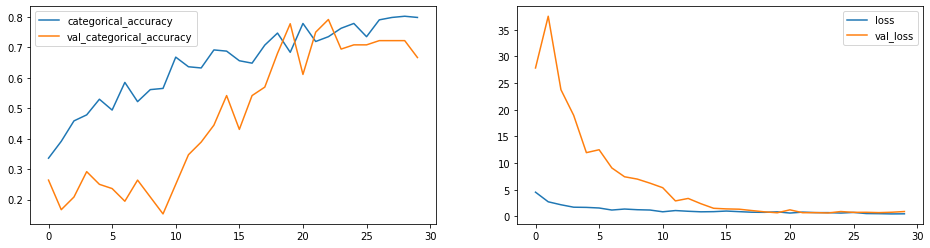

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
axes[0].plot(history.history['categorical_accuracy'])   
axes[0].plot(history.history['val_categorical_accuracy'])
axes[0].legend(['categorical_accuracy','val_categorical_accuracy'])

axes[1].plot(history.history['loss'])   
axes[1].plot(history.history['val_loss'])
axes[1].legend(['loss','val_loss'])